In [3]:
import pickle
print(pickle.HIGHEST_PROTOCOL)
import sys
print(sys.version)

4
3.7.0 (v3.7.0:1bf9cc5093, Jun 26 2018, 23:26:24) 
[Clang 6.0 (clang-600.0.57)]


In [ ]:
path = "/Users/ardsnijders/Documents/GitHub/Lisa/active_learning/results/ard_output_dir_results/datamaps/test/datamap_test/roberta-large/bald/42/confidences.pickle"

df2 = pd.read_pickle(path)

In [88]:
import pandas as pd
import numpy as np
import random
from pprint import pprint
import sys

In [36]:
sample_ids = []
results = []
with open(path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.replace(',',';',1)
        sample_ids.append(line.split(';')[0])

In [117]:
pred = np.random.dirichlet(np.ones(3),size=3)
pred

array([[0.61468459, 0.056259  , 0.32905641],
       [0.38493151, 0.20726966, 0.40779883],
       [0.28602757, 0.45597168, 0.25800075]])

In [145]:
num_epochs = 10
results = []

for sample_id in sample_ids:
    result = []
    for epoch in range(num_epochs):
        random_prediction = np.random.dirichlet([0.5,5,20],size=1)[0].tolist()
        random_label = random.randint(b=2, a=0)
        result.append((random_prediction, random_label))
    results.append(result)

In [146]:
confidences_mean = []
confidences_std = []

for sample_id, result in zip(sample_ids, results):
    confidences = []
    for prediction in result:
        output = prediction[0]
        label = prediction[1]
        gold_confidence = output[label]
        confidences.append(gold_confidence)
    
    confidence_mean = np.mean(confidences)
    confidence_std = np.std(confidences)
    
    confidences_mean.append(confidence_mean)
    confidences_std.append(confidence_std)
    
    
df = pd.DataFrame(zip(sample_ids, confidences_mean, confidences_std), columns=['id', 'mean_conf', 'conf_std'])

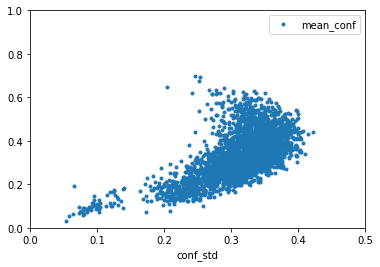

In [148]:
df.plot(x='conf_std', y='mean_conf', style='.', xlim=(0,0.5), ylim=(0,1))

In [162]:
import os
import pickle
ex_dict = {'a':1, 'b':2}
parent_dir = os.getcwd()
filepath = parent_dir + '/example_2.pickle'
with open(filepath, 'wb') as f:
    pickle.dump(ex_dict, f)
    
#     f.close()

In [161]:
import os
print(os.getcwd())

/Users/ardsnijders/Documents/GitHub/Lisa/active_learning/data_analysis
